# A 3d Targeter
## Given: 
An Earth-Moon system with condition:
$$\vec{r}_0 = [300000, 0, 0] \text{ km} $$
$$\vec{v}_0 = [0, 0.5, 0.5] \text{ km/s} $$
The spacecraft want to reach:
$$\vec{r}_1 = [500000, -90000, 200000] \text{ km}$$

## Find:
a) After 10 days how far is $\vec{r}_0$, $\vec{v}_0$, and $||\vec{e}||$? Dimensional and dimesnional. Implement $\Delta \vec{v}$ for fixed time targeter.

b) Plot results and a give results of $\vec{v}_0$ and $||\Delta \vec{v}_0||$.

c) Is STM baseline? Which should  you use? Why? How many iterations? Check n and m. Is solution unique? How do you know? Check the Jacobi constant for last history. How accurate is the integration?

d) Try 15 days. Can you use 15 days as inital guess? Do you need continuation? Is one step adequete. 

In [37]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Poincare_fnc as pn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [38]:
system = "Earth-Moon"
r0_dim_vec = np.array([300000, 0, 0])
v0_dim_vec = np.array([0, 0.5, 0.5])

r1_dim_vec = np.array([500000, -90000, 200000])
t_span_dim = np.array([0, 10])

changeable = ('x_dot_0', 'y_dot_0', 'z_dot_0')

### Part a)

In [39]:
r0_vec = r0_dim_vec/SS3.loc[system, 'l*']
v0_vec = v0_dim_vec*SS3.loc[system, 't*']/SS3.loc[system, 'l*']
t_span = t_span_dim*24*3600 / SS3.loc[system, 't*']

IC_orig = np.append(r0_vec, v0_vec)

traj = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC_orig, method='RK45',
                 rtol=10**-12, atol=10**-16)


In [47]:
r1_vec = r1_dim_vec/SS3.loc[system, 'l*']
keys = ['x_f', 'y_f', 'z_f']

target = dict(zip(keys, r1_vec))

IC, final_per, tf_per = pn.target(IC_orig[:6], SS3.loc[system, 'miu'], t_span=t_span, target=target, tol=10**-10, 
                                      change_tf=True, changeable=changeable, attempts=10)

traj_targ = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC[:6], method='RK45',
                      rtol=10**-12, atol=10**-16)

error = np.linalg.norm(traj_targ.y[:3,-1] - r1_vec)
delv = IC[3:6] - IC_orig[3:6]
delv_dim = delv*SS3.loc[system, 'l*']/SS3.loc[system, 't*']

print('The error is:', error)
print('The error in (km):', pn.L_2_dim(error, SS3.loc[system, 'l*']))

print('\n')
print('*'*15, 'Non-Dimensional', '*'*15)
print('Orignal trajectory position after 10 days:', np.round(traj_targ.y[:3,-1],5))
print('Orignal velocity position after 10 days:', np.round(traj_targ.y[3:6,-1],5))
print('DeltaV required in each direction: ', np.round(delv,5))
print('DeltaV required: ', round(np.linalg.norm(delv),5))

print('\n')
print('*'*15, 'Dimensional', '*'*15)
print('Orignal trajectory position after 10 days (km):', np.round(traj_targ.y[:3,-1]*SS3.loc[system, 'l*'],5))
print('Orignal velocity position after 10 days (km/s):', np.round(traj_targ.y[3:6,-1]*SS3.loc[system, 'l*']/SS3.loc[system, 't*'],5))
print('DeltaV required in each direction (km/s): ', np.round(delv_dim,5))
print('DeltaV required (km/s): ', round(np.linalg.norm(delv_dim),5))


The error is: 1.467500698744735e-13
The error in (km): 5.641072685974761e-08


*************** Non-Dimensional ***************
Orignal trajectory position after 10 days: [ 1.30073 -0.23413  0.52029]
Orignal velocity position after 10 days: [ 0.10913 -0.68159 -0.07419]
DeltaV required in each direction:  [ 0.06938 -0.07176  0.11084]
DeltaV required:  0.14916


*************** Dimensional ***************
Orignal trajectory position after 10 days (km): [500000. -90000. 200000.]
Orignal velocity position after 10 days (km/s): [ 0.1118  -0.69833 -0.07602]
DeltaV required in each direction (km/s):  [ 0.07108 -0.07352  0.11356]
DeltaV required (km/s):  0.15282


### Part b)

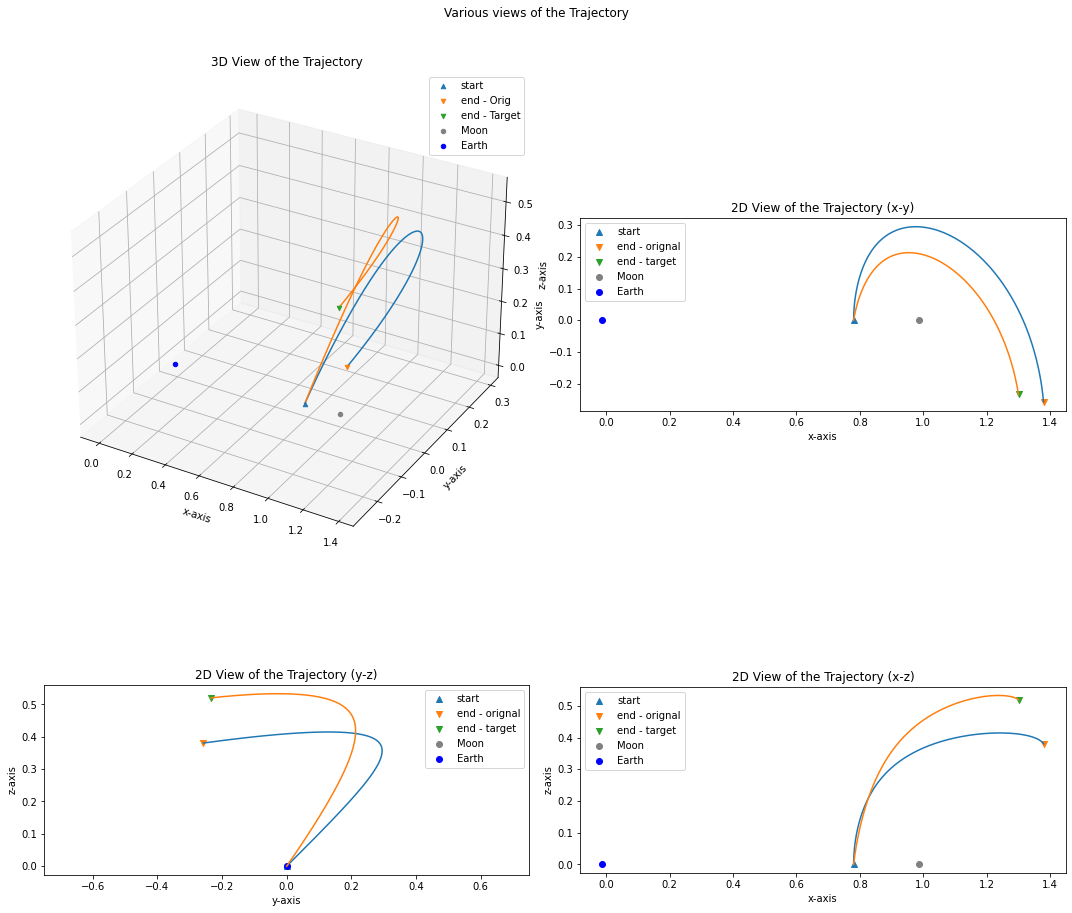

In [48]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(traj.y[0,:], traj.y[1,:], traj.y[2,:])
ax1.plot(traj_targ.y[0,:], traj_targ.y[1,:], traj_targ.y[2,:])
ax1.scatter(traj.y[0,0], traj.y[1,0], traj.y[2,0], label='start', marker='^')
ax1.scatter(traj.y[0,-1], traj.y[1,-1], traj.y[2,-1], label='end - Orig', marker='v')
ax1.scatter(traj_targ.y[0,-1], traj_targ.y[1,-1], traj_targ.y[2,-1], label='end - Target', marker='v')
ax1.scatter(1-SS3.loc[system, 'miu'], 0, 0, marker='o', color='grey', label='Moon')
ax1.scatter(-SS3.loc[system, 'miu'], 0, 0, marker='o', color='Blue', label='Earth')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.set_zlabel('z-axis')
ax1.set_title('3D View of the Trajectory')
ax1.legend()



ax2 = fig.add_subplot(222)
ax2.plot(traj.y[0,:], traj.y[1,:])
ax2.plot(traj_targ.y[0,:], traj_targ.y[1,:])
ax2.scatter(traj.y[0,0], traj.y[1,0], label='start', marker='^')
ax2.scatter(traj.y[0,-1], traj.y[1,-1], label='end - orignal', marker='v')
ax2.scatter(traj_targ.y[0,-1], traj_targ.y[1,-1], label='end - target', marker='v')
ax2.scatter(1-SS3.loc[system, 'miu'], 0, marker='o', color='grey', label='Moon')
ax2.scatter(-SS3.loc[system, 'miu'], 0, marker='o', color='Blue', label='Earth')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')
ax2.set_aspect('equal', 'box')
ax2.set_title('2D View of the Trajectory (x-y)')
ax2.legend()

ax3 = fig.add_subplot(223)
ax3.plot(traj.y[1,:], traj.y[2,:])
ax3.plot(traj_targ.y[1,:], traj_targ.y[2,:])
ax3.scatter(traj.y[1,0], traj.y[2,0], label='start', marker='^')
ax3.scatter(traj.y[1,-1], traj.y[2,-1], label='end - orignal', marker='v')
ax3.scatter(traj_targ.y[1,-1], traj_targ.y[2,-1], label='end - target', marker='v')
ax3.scatter(0, 0, marker='o', color='grey', label='Moon')
ax3.scatter(0, 0, marker='o', color='Blue', label='Earth')
ax3.set_xlabel('y-axis')
ax3.set_ylabel('z-axis')
ax3.set_aspect('equal', 'box')
ax3.set_xlim([-0.75, 0.75])
ax3.set_title('2D View of the Trajectory (y-z)')
ax3.legend()

ax4 = fig.add_subplot(224)
ax4.plot(traj.y[0,:], traj.y[2,:])
ax4.plot(traj_targ.y[0,:], traj_targ.y[2,:])
ax4.scatter(traj.y[0,0], traj.y[2,0], label='start', marker='^')
ax4.scatter(traj.y[0,-1], traj.y[2,-1], label='end - orignal', marker='v')
ax4.scatter(traj_targ.y[0,-1], traj_targ.y[2,-1], label='end - target', marker='v')
ax4.scatter(1-SS3.loc[system, 'miu'], 0, marker='o', color='grey', label='Moon')
ax4.scatter(-SS3.loc[system, 'miu'], 0, marker='o', color='Blue', label='Earth')
ax4.set_xlabel('x-axis')
ax4.set_ylabel('z-axis')
ax4.set_aspect('equal', 'box')
ax4.set_title('2D View of the Trajectory (x-z)')
ax4.legend()

fig.suptitle('Various views of the Trajectory')
fig.tight_layout()
fig.subplots_adjust(top=0.95)